## Apply k-fold cross-validation technique to find satisfactory hyperparameter values

In [2]:
from sklearn.datasets   import  load_breast_cancer
from sklearn.model_selection import  train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing  import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from matplotlib.colors import ListedColormap
import numpy as np

In [51]:
cancer = load_breast_cancer()
X_data = cancer.data
Y_data = cancer.target


X_train , X_test ,Y_train , Y_test = train_test_split(X_data , Y_data, test_size= 0.3, random_state=1 , stratify= Y_data )
print(X_train.shape)
print(X_test.shape)

(398, 30)
(171, 30)


In [52]:
pipe_SVC= make_pipeline( StandardScaler(),
                         SVC( kernel='linear',  C=1.0,  random_state=1)
                         )

In [53]:
pipe_LR= make_pipeline(  StandardScaler(),
                         LogisticRegression()
                         )

In [54]:
scores_of_svc= cross_val_score( estimator=pipe_SVC,
                                X=X_train,
                                y=Y_train,
                                cv=10,
                                n_jobs=-1
                                
                                )



print(f'\nCV accuracy scores of SVC:\n\n {scores_of_svc}')
print('*'*100)
print(f'\n\nCV accuracy of SVC: \n\n{np.mean(scores_of_svc):.3f} ' f'+/- {np.std(scores_of_svc):.3f}')


CV accuracy scores of SVC:

 [0.95       0.975      1.         0.975      1.         0.925
 0.95       0.975      0.97435897 1.        ]
****************************************************************************************************


CV accuracy of SVC: 

0.972 +/- 0.024


In [55]:
scores_of_LR = cross_val_score( estimator=pipe_LR,
                                X=X_train,
                                y=Y_train,
                                cv=10,
                                n_jobs=-1
                                )



print(f'\nCV accuracy scores of LogisticRegression model:\n\n {scores_of_LR}')
print('*'*100)
print(f'\n\nCV accuracy of LogisticRegression model: \n\n{np.mean(scores_of_LR):.3f} ' f'+/- {np.std(scores_of_LR):.3f}')


CV accuracy scores of LogisticRegression model:

 [0.95  0.975 1.    1.    1.    0.95  0.975 0.975 1.    1.   ]
****************************************************************************************************


CV accuracy of LogisticRegression model: 

0.982 +/- 0.020


### Using GridSearchCV to find best hyperprameters for SVM classifier along with most important features which selected from SequentialFeatureSelector

In [3]:
cancer = load_breast_cancer()
x = cancer.data[: , [23,26]]
y = cancer.target
XX_train , XX_test ,YY_train , YY_test = train_test_split(x, y, test_size= 0.30, random_state=1 , stratify=y )

In [4]:
pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))

In [5]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0 , 10000.0]

param_grid = [{'svc__C': param_range, 
               'svc__kernel': ['linear']},
              
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']},
              
            #   {'svc__C': param_range, 
            #    'svc__gamma': param_range, 
            #    'svc__kernel': ['poly']}
              ]

gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  refit=False,           # refit parameter, will refit the gs.best_estimator_ to the whole training set 
                  n_jobs=8,  # -1 for all cpu
                  cv=10
                  )


gs = gs.fit(XX_train, YY_train)
print(gs.best_score_)
print(gs.best_params_)

0.9548717948717949
{'svc__C': 1000.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


In [7]:
best_svc_estimator = SVC( kernel='rbf', gamma=0.01,  C=1000.0,  random_state=1)
best_svc_estimator.fit(XX_train,YY_train)

yy_pred_test = best_svc_estimator.predict(XX_test)


accuracy_test = accuracy_score(YY_test, yy_pred_test)
print("accuracy score for test data is : {:.3f}".format(accuracy_test))


accuracy score for test data is : 0.912


### Plot confusion matrix to evaluate SVC(rbf kernel) classifier

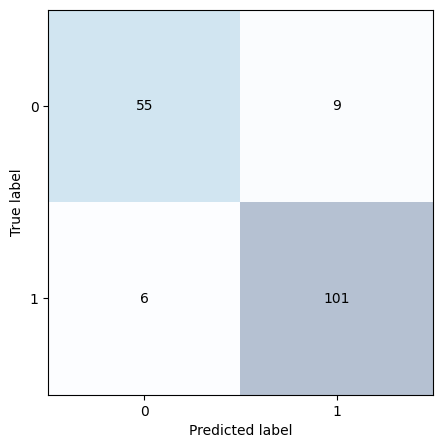

In [8]:
confmat = confusion_matrix(y_true=YY_test, y_pred=yy_pred_test)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
        

ax.xaxis.set_ticks_position('bottom')  
plt.xlabel('Predicted label') 
plt.ylabel('True label')
plt.savefig('./SVM_img/confusion matrix for SVM with rbf kernel classsifier.png', dpi=300)
plt.show()

In [60]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    markers = ('o', 's')
    colors = ('red', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x=X[y == cl, 0], 
                        y=X[y == cl, 1],
                        alpha=0.8, 
                        c=colors[idx],
                        marker=markers[idx], 
                        label=f'Class {cl}', 
                        edgecolor='black')

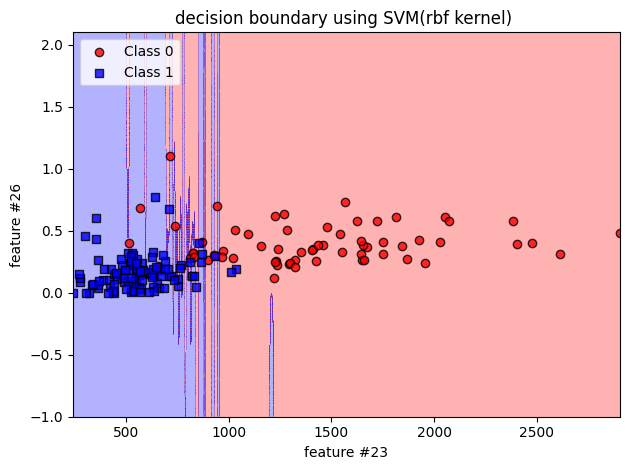

In [61]:
plot_decision_regions(X= XX_test, y= YY_test, classifier= best_svc_estimator )
plt.title('decision boundary using SVM(rbf kernel) ')
plt.xlabel('feature #23')
plt.ylabel('feature #26')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('./SVM_img/decision boundary using rbf kernel).png', dpi=300)
plt.show()

## classify cancer dataset with hyperprameter tuning for SVC (linear kernel) 

In [10]:
cancer = load_breast_cancer()
x = cancer.data[: , [23,26]]
y = cancer.target
XX_train , XX_test ,YY_train , YY_test = train_test_split(x, y, test_size= 0.30, random_state=1 , stratify=y )

In [11]:
pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))

In [12]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0 , 10000.0]

param_grid = [{'svc__C': param_range, 
               'svc__kernel': ['linear']},
              ]

gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  refit=False,           # refit parameter, will refit the gs.best_estimator_ to the whole training set 
                  n_jobs=8,              # -1 for all cpu
                  cv= 148
                  )


gs = gs.fit(XX_train, YY_train)
print(gs.best_score_)
print(gs.best_params_)

0.9504504504504504
{'svc__C': 1.0, 'svc__kernel': 'linear'}


In [13]:
best_param_for_linear_kernel_svc = SVC( kernel='linear',  C=1.0,  random_state=1)
best_param_for_linear_kernel_svc.fit(XX_train,YY_train)

yy_predd = best_param_for_linear_kernel_svc.predict(XX_test)


accuracy_test = accuracy_score(YY_test, yy_predd)
print("accuracy score for test data is : {:.3f}".format(accuracy_test))

accuracy score for test data is : 0.918


### Plot confusion matrix to evaluate SVC(liear kernel) classifier

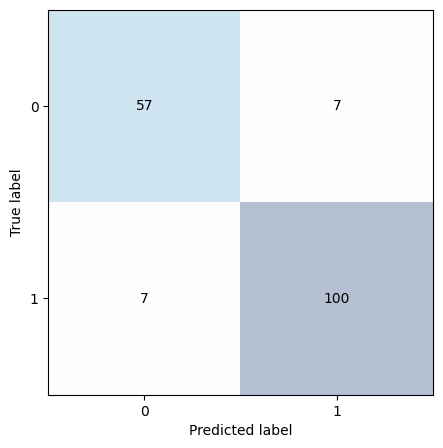

In [14]:
confmat = confusion_matrix(y_true=YY_test, y_pred=yy_predd)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
        

ax.xaxis.set_ticks_position('bottom')  
plt.xlabel('Predicted label') 
plt.ylabel('True label')
plt.savefig('./SVM_img/confusion matrix for SVM with liear kernel classsifier.png', dpi=300)
plt.show()

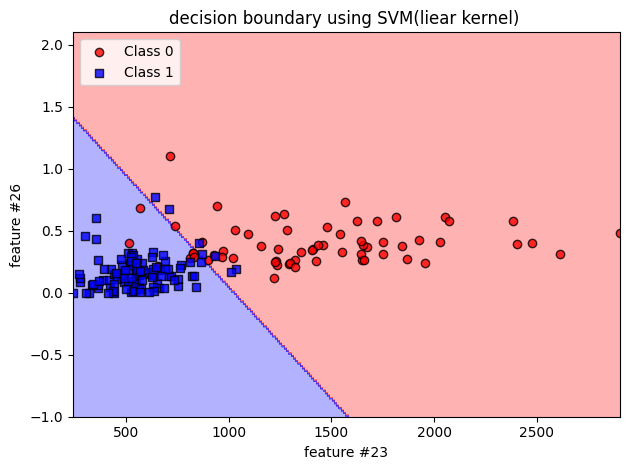

In [66]:
plot_decision_regions(X= XX_test, y= YY_test, classifier= best_param_for_linear_kernel_svc )
plt.title('decision boundary using SVM(liear kernel) ')
plt.xlabel('feature #23')
plt.ylabel('feature #26')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('./SVM_img/kernel SVM liear kernel).png', dpi=300)
plt.show()

### Selecting best hyperparameter for logistic Regression classifier 

In [15]:
cancer = load_breast_cancer()
x = cancer.data[: , [23,26]]
y = cancer.target
XX_train , XX_test ,YY_train , YY_test = train_test_split(x, y, test_size= 0.30, random_state=1 , stratify=y )

In [16]:
pipe_LR = make_pipeline(  StandardScaler(),
                          LogisticRegression(random_state=1)
                         
                         )

In [17]:
param_grid = [
    {
        'logisticregression__penalty': ['l1', 'l2'],
        'logisticregression__C': np.logspace(-4, 4, 20),
        'logisticregression__solver': ['liblinear']  # 'liblinear' supports both 'l1' and 'l2'
    }
# ,
#     {
#         'logisticregression__penalty': ['l2'],
#         'logisticregression__C': np.logspace(-4, 4, 20),
#         'logisticregression__solver': ['lbfgs', 'newton-cg', 'sag', 'saga'] # These solvers support 'l2'
#     },
#     {
#         'logisticregression__penalty': ['elasticnet'],
#         'logisticregression__C': np.logspace(-4, 4, 20),
#         'logisticregression__solver': ['saga'], # 'saga' supports 'elasticnet'
#         'logisticregression__l1_ratio': [0.1, 0.5, 0.9] # For elasticnet, define l1_ratio
#     }
]


gs_lr = GridSearchCV(  estimator=pipe_LR, 
                       param_grid=param_grid, 
                       scoring='accuracy', 
                       refit=False,           # refit parameter, will refit the gs.best_estimator_ to the whole training set 
                       n_jobs=8,  # -1 for all cpu
                       cv=50
                    )


gs = gs_lr.fit(XX_train, YY_train)
print(gs.best_score_)
print(gs.best_params_)

0.9525
{'logisticregression__C': 0.23357214690901212, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}


In [18]:
best_param_for_LogisticRegression = LogisticRegression(solver = 'liblinear', penalty= 'l1', C=0.23357214690901212,  random_state=1)
best_param_for_LogisticRegression.fit(XX_train,YY_train)

yy_pred = best_param_for_LogisticRegression.predict(XX_test)


accuracy_test = accuracy_score(YY_test, yy_pred)
print("accuracy score for test data is : {:.3f}".format(accuracy_test))

accuracy score for test data is : 0.930


### Plot confusion matrix to evaluate LogisticRegression classifier

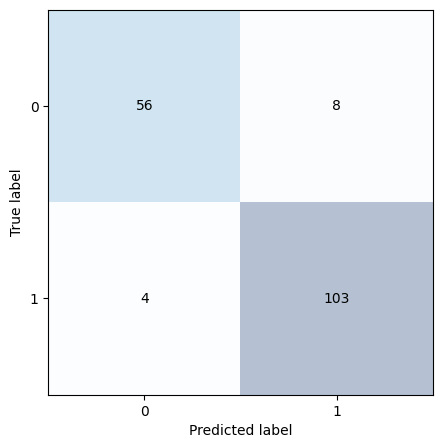

In [19]:
confmat = confusion_matrix(y_true=YY_test, y_pred=yy_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
        

ax.xaxis.set_ticks_position('bottom')  
plt.xlabel('Predicted label') 
plt.ylabel('True label')
plt.savefig('./SVM_img/confusion matrix for LogisticRegression classsifier.png', dpi=300)
plt.show()



   

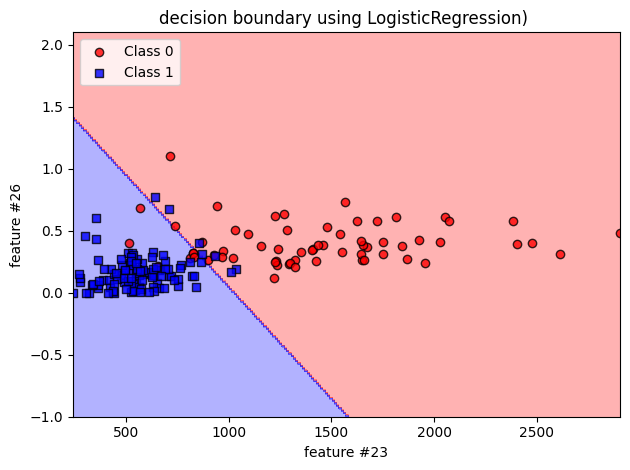

In [71]:
plot_decision_regions(X= XX_test, y= YY_test, classifier= best_param_for_linear_kernel_svc )
plt.title('decision boundary using LogisticRegression) ')
plt.xlabel('feature #23')
plt.ylabel('feature #26')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('./SVM_img/LogisticRegression.png', dpi=300)
plt.show()